In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
from scipy.spatial import distance


Data = pd.read_csv("Movies.csv", header=None) #, sep=',')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# 1865474 movies and 14998 days
Data

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
1,tt0000001,short,Carmencita,0,1894,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,tt0000002,short,Le clown et ses chiens,0,1892,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,tt0000003,short,Pauvre Pierrot,0,1892,4,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,tt0000004,short,Un bon bock,0,1892,12,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865469,tt9916754,movie,Chico Albuquerque - Revelações,0,2013,49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1865470,tt9916766,tvEpisode,Episode #10.15,0,2019,43,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1865471,tt9916840,tvEpisode,Horrid Henry's Comic Caper,0,2014,11,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1865472,tt9916856,short,The Wind,0,2015,27,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
Data = np.asarray(Data)

In [4]:
Data.shape

(1865474, 34)

In [5]:
Data[:,3]

array(['isAdult', '0', '0', ..., 0, 0, 0], dtype=object)

In [6]:
Data = np.hstack((Data[:,3][:,None], Data[:,6:]))
print(Data)

[['isAdult' 'Action' 'Adult' ... 'Thriller' 'War' 'Western']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
Data = Data[1:,:]
Data = np.float32(Data)


print(np.sum(Data))
print(Data.shape)


3526186.0
(1865473, 29)


In [8]:
#### Question 2 ####


In [9]:
# Kmeans_online

In [50]:
class Kmeans_online:
    # Initialize the class
    def __init__(self, X, num_class):  
      
        # number of days
        self.dim = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # number of clusters
        self.num_class = num_class
        
        # Initial centers
        self.centers = self.initial_centers()
        
        # Loss 
        self.errors = []
        
        
    def initial_centers(self):
        ub = np.max(self.X, axis = 0)
        lb = np.min(Data, axis = 0)
        centers = np.zeros((self.num_class, self.dim))
        for k in range(self.num_class):
            for p in range(self.dim):
                centers[k, p] = np.random.uniform() * (ub[p] - lb[p]) + lb[p]
        
        return centers

        
    def update(self, X, it): 
        
        eta = 1./(it+1)
        error_curr = 0
        N_batch = X.shape[0]
        temp_dist = np.zeros((self.num_class, 1))
        centers_grad = np.zeros_like(self.centers)
        
        distance_matrix = distance.cdist(X, self.centers, 'euclidean')
        idx = np.argmin(distance_matrix, axis = 1)
        
        for k in range(N_batch):
            centers_grad[idx[k]:idx[k]+1,:] += 2 * (X[k:k+1,:] - self.centers[idx[k]:idx[k]+1,:])
            
        self.centers += eta * centers_grad / N_batch * self.num_class

        distance_matrix = distance.cdist(X, self.centers, 'euclidean')
        error_curr = np.sum(np.min(distance_matrix, axis = 1))
        return error_curr
    
    
    # Fetches a mini-batch of data
    def fetch_minibatch(self,X, N_batch):
        N = X.shape[0]
        idx = np.random.choice(N, N_batch, replace=False)
        X_batch = X[idx,:]
        return X_batch
    

    def train(self, T, N_batch):   
        
                
        for it in range(T):
            X_batch = self.fetch_minibatch(self.X, N_batch)
            error = self.update(X_batch, it)
            
            self.errors.append(error)

            # Print
            if it % 10 == 0:
                print('It: %d, error: %.3e' % 
                      (it, error))
    
    
    def get_centers(self): 
        return self.centers
    
    def get_final_error(self):
        distance_matrix = distance.cdist(self.X, self.centers, 'euclidean')
        distances = np.min(distance_matrix, axis = 1)
        error = np.sum(distances)
        minimum = np.min(distances)
        maximum = np.max(distances)
        mean_value = np.mean(distances)
        return minimum, mean_value, maximum
    

In [52]:
num_class = [5, 10, 20, 50, 100, 200, 400, 500]
N_total = len(num_class)
final_minimum = np.zeros((N_total, 1))
final_mean_value = np.zeros((N_total, 1))
final_maximum = np.zeros((N_total, 1))

for k in range(N_total):
    model = Kmeans_online(Data, num_class[k])
    model.train(500, 10000)

    minimum, mean_value, maximum = model.get_final_error()
    final_minimum[k] = minimum
    final_mean_value[k] = mean_value
    final_maximum[k] = maximum
    
    print(minimum, mean_value, maximum)


It: 0, error: 1.654e+04
It: 10, error: 1.235e+04
It: 20, error: 1.235e+04
It: 30, error: 1.240e+04
It: 40, error: 1.236e+04
It: 50, error: 1.233e+04
It: 60, error: 1.232e+04
It: 70, error: 1.235e+04
It: 80, error: 1.234e+04
It: 90, error: 1.238e+04
It: 100, error: 1.235e+04
It: 110, error: 1.236e+04
It: 120, error: 1.227e+04
It: 130, error: 1.237e+04
It: 140, error: 1.232e+04
It: 150, error: 1.236e+04
It: 160, error: 1.237e+04
It: 170, error: 1.235e+04
It: 180, error: 1.234e+04
It: 190, error: 1.235e+04
It: 200, error: 1.231e+04
It: 210, error: 1.236e+04
It: 220, error: 1.233e+04
It: 230, error: 1.238e+04
It: 240, error: 1.234e+04
It: 250, error: 1.237e+04
It: 260, error: 1.234e+04
It: 270, error: 1.235e+04
It: 280, error: 1.232e+04
It: 290, error: 1.236e+04
It: 300, error: 1.238e+04
It: 310, error: 1.237e+04
It: 320, error: 1.237e+04
It: 330, error: 1.238e+04
It: 340, error: 1.238e+04
It: 350, error: 1.236e+04
It: 360, error: 1.235e+04
It: 370, error: 1.234e+04
It: 380, error: 1.238e+

It: 50, error: 2.541e+04
It: 60, error: 1.806e+04
It: 70, error: 1.441e+04
It: 80, error: 1.583e+04
It: 90, error: 2.169e+04
It: 100, error: 1.239e+04
It: 110, error: 1.240e+04
It: 120, error: 2.420e+04
It: 130, error: 2.680e+04
It: 140, error: 1.877e+04
It: 150, error: 1.357e+04
It: 160, error: 1.367e+04
It: 170, error: 1.045e+04
It: 180, error: 1.079e+04
It: 190, error: 1.019e+04
It: 200, error: 9.928e+03
It: 210, error: 9.938e+03
It: 220, error: 9.963e+03
It: 230, error: 9.920e+03
It: 240, error: 9.906e+03
It: 250, error: 9.981e+03
It: 260, error: 9.896e+03
It: 270, error: 9.876e+03
It: 280, error: 9.904e+03
It: 290, error: 9.970e+03
It: 300, error: 9.882e+03
It: 310, error: 9.915e+03
It: 320, error: 9.891e+03
It: 330, error: 9.938e+03
It: 340, error: 9.903e+03
It: 350, error: 9.914e+03
It: 360, error: 9.950e+03
It: 370, error: 1.006e+04
It: 380, error: 9.931e+03
It: 390, error: 1.001e+04
It: 400, error: 9.922e+03
It: 410, error: 9.884e+03
It: 420, error: 9.980e+03
It: 430, error: 9

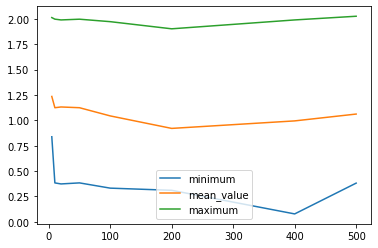

In [53]:
plt.figure(1, figsize=(6,4))
plt.plot(num_class, final_minimum, label = "minimum")
plt.plot(num_class, final_mean_value, label = "mean_value")
plt.plot(num_class, final_maximum, label = "maximum")
plt.legend()
plt.savefig('./kmeans_error.png', dpi = 100)
plt.show()


In [ ]:
#### Question 3 ####


In [30]:
# Kmeanspp_online

In [39]:
class Kmeanspp_online:
    # Initialize the class
    def __init__(self, X, num_class):  
      
        # number of days
        self.dim = X.shape[1]
        
        # number of movies
        self.N = X.shape[0]
        
        # store data
        self.X = X
        
        # number of clusters
        self.num_class = num_class
        
        # Initial centers
        self.centers = self.initial_centers()
        
        # Loss 
        self.errors = []

        
    def initial_centers(self):
        idx = np.random.randint(self.N)
        prob = np.zeros((self.N, 1))
        temp_dist = np.zeros((self.num_class, 1))
        candidates = np.arange(10000)  # np.arange(self.N)
        
        centers = self.X[idx:idx+1,:]
        
        X = self.fetch_minibatch(self.X, 10000)
        
        for k in range(1, self.num_class):
            distance_matrix = distance.cdist(X, centers, 'euclidean')**2
            prob = np.min(distance_matrix, axis = 1)
            prob = prob / np.sum(prob)
            idx = np.random.choice(candidates, 1, p=prob)[0]
            centers_temp = X[idx:idx+1,:]
            centers = np.vstack((centers, centers_temp))
            
        return centers

        
    def update(self, X, it): 
        
        eta = 1/(it+1)
        error_curr = 0
        N_batch = X.shape[0]
        temp_dist = np.zeros((self.num_class, 1))
        centers_grad = np.zeros_like(self.centers)
        
        distance_matrix = distance.cdist(X, self.centers, 'euclidean')
        idx = np.argmin(distance_matrix, axis = 1)
        
        for k in range(N_batch):
            centers_grad[idx[k]:idx[k]+1,:] += 2 * (X[k:k+1,:] - self.centers[idx[k]:idx[k]+1,:])
            
        self.centers += eta * centers_grad / N_batch

        distance_matrix = distance.cdist(X, self.centers, 'euclidean')
        error_curr = np.sum(np.min(distance_matrix, axis = 1))
        return error_curr
    
    
    # Fetches a mini-batch of data
    def fetch_minibatch(self,X, N_batch):
        N = X.shape[0]
        idx = np.random.choice(N, N_batch, replace=False)
        X_batch = X[idx,:]
        return X_batch
    

    def train(self, T, N_batch):   
                
        for it in range(T):
            X_batch = self.fetch_minibatch(self.X, N_batch)
            error = self.update(X_batch, it)
            
            self.errors.append(error)

            # Print
            if it % 10 == 0:
                print('It: %d, error: %.3e' % 
                      (it, error))
    
    
    def get_centers(self): 
        return self.centers
    
    def get_final_error(self):
        distance_matrix = distance.cdist(self.X, self.centers, 'euclidean')
        distances = np.min(distance_matrix, axis = 1)
        error = np.sum(distances)
        minimum = np.min(distances)
        maximum = np.max(distances)
        mean_value = np.mean(distances)
        return minimum, mean_value, maximum
    

In [40]:
num_class = [5, 10, 20, 50, 100, 200, 400, 500]
N_total = len(num_class)
final_minimum_pp = np.zeros((N_total, 1))
final_mean_value_pp = np.zeros((N_total, 1))
final_maximum_pp = np.zeros((N_total, 1))



for k in range(N_total):
    model = Kmeanspp_online(Data, num_class[k])
    model.train(500, 10000)

    minimum, mean_value, maximum = model.get_final_error()
    final_minimum_pp[k] = minimum
    final_mean_value_pp[k] = mean_value
    final_maximum_pp[k] = maximum
    
    print(minimum, mean_value, maximum)



It: 0, error: 1.234e+04
It: 10, error: 1.122e+04
It: 20, error: 1.116e+04
It: 30, error: 1.115e+04
It: 40, error: 1.112e+04
It: 50, error: 1.109e+04
It: 60, error: 1.112e+04
It: 70, error: 1.106e+04
It: 80, error: 1.111e+04
It: 90, error: 1.106e+04
It: 100, error: 1.113e+04
It: 110, error: 1.111e+04
It: 120, error: 1.111e+04
It: 130, error: 1.111e+04
It: 140, error: 1.107e+04
It: 150, error: 1.109e+04
It: 160, error: 1.105e+04
It: 170, error: 1.104e+04
It: 180, error: 1.108e+04
It: 190, error: 1.104e+04
It: 200, error: 1.110e+04
It: 210, error: 1.108e+04
It: 220, error: 1.109e+04
It: 230, error: 1.102e+04
It: 240, error: 1.115e+04
It: 250, error: 1.101e+04
It: 260, error: 1.101e+04
It: 270, error: 1.105e+04
It: 280, error: 1.104e+04
It: 290, error: 1.100e+04
It: 300, error: 1.107e+04
It: 310, error: 1.109e+04
It: 320, error: 1.103e+04
It: 330, error: 1.104e+04
It: 340, error: 1.109e+04
It: 350, error: 1.103e+04
It: 360, error: 1.105e+04
It: 370, error: 1.108e+04
It: 380, error: 1.106e+

It: 70, error: 7.531e+02
It: 80, error: 7.446e+02
It: 90, error: 7.768e+02
It: 100, error: 7.394e+02
It: 110, error: 8.014e+02
It: 120, error: 7.510e+02
It: 130, error: 7.877e+02
It: 140, error: 7.655e+02
It: 150, error: 7.809e+02
It: 160, error: 7.885e+02
It: 170, error: 7.456e+02
It: 180, error: 7.400e+02
It: 190, error: 7.282e+02
It: 200, error: 7.223e+02
It: 210, error: 7.918e+02
It: 220, error: 8.287e+02
It: 230, error: 7.390e+02
It: 240, error: 7.389e+02
It: 250, error: 7.548e+02
It: 260, error: 7.623e+02
It: 270, error: 7.752e+02
It: 280, error: 7.825e+02
It: 290, error: 7.393e+02
It: 300, error: 7.898e+02
It: 310, error: 7.527e+02
It: 320, error: 8.093e+02
It: 330, error: 7.804e+02
It: 340, error: 7.490e+02
It: 350, error: 7.700e+02
It: 360, error: 7.507e+02
It: 370, error: 7.513e+02
It: 380, error: 7.917e+02
It: 390, error: 7.739e+02
It: 400, error: 7.564e+02
It: 410, error: 8.246e+02
It: 420, error: 7.640e+02
It: 430, error: 7.653e+02
It: 440, error: 7.251e+02
It: 450, error:

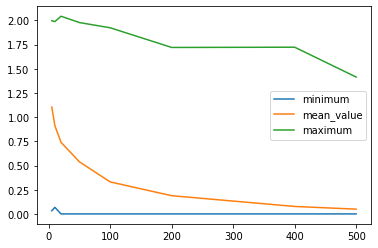

In [41]:
plt.figure(2, figsize=(6,4))
plt.plot(num_class, final_minimum_pp, label = "minimum")
plt.plot(num_class, final_mean_value_pp, label = "mean_value")
plt.plot(num_class, final_maximum_pp, label = "maximum")
plt.legend()
plt.savefig('./kmeanspp_error.png', dpi = 100)
plt.show()


In [103]:
from scipy.spatial import distance


coords1 = [(0, 2),
          (2, 0),
          (0, 1),
          (1, 0)]


coords2 = [(1, 1),
          (1, 1)]


here = distance.cdist(coords1, coords2, 'euclidean')

print(here)
np.argmax(here, axis = 1)

[[1.41421356 1.41421356]
 [1.41421356 1.41421356]
 [1.         1.        ]
 [1.         1.        ]]


array([0, 0, 0, 0])